### Importing the dataset

In [ ]:
# Let's check the number of images in each directory
import os

# Walk through the directory and find the number of files, directory and directory path
for dirpath, dirnames, filenames in os.walk("Eye_diseases"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Eye_diseases'.
There are 5 directories and 0 images in 'Eye_diseases\test'.
There are 0 directories and 9 images in 'Eye_diseases\test\Bulging_Eyes'.
There are 0 directories and 20 images in 'Eye_diseases\test\Cataracts'.
There are 0 directories and 30 images in 'Eye_diseases\test\Crossed_Eyes'.
There are 0 directories and 22 images in 'Eye_diseases\test\Glaucoma'.
There are 0 directories and 20 images in 'Eye_diseases\test\Uveitis'.
There are 5 directories and 0 images in 'Eye_diseases\train'.
There are 0 directories and 25 images in 'Eye_diseases\train\Bulging_Eyes'.
There are 0 directories and 40 images in 'Eye_diseases\train\Cataracts'.
There are 0 directories and 164 images in 'Eye_diseases\train\Crossed_Eyes'.
There are 0 directories and 74 images in 'Eye_diseases\train\Glaucoma'.
There are 0 directories and 43 images in 'Eye_diseases\train\Uveitis'.


### Get the class names programmatically

In [ ]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np

data_dir = pathlib.Path("Eye_diseases/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Bulging_Eyes' 'Cataracts' 'Crossed_Eyes' 'Glaucoma' 'Uveitis']


### Let's Visualize some random images

In [ ]:
# Let's visualize some of the images from the directories
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    """
    Function to view a random image from the target directory of target class.
    
    Args:
        target_dir (str): Name of the target directory
        target_class (str): Name of the target class
    Returns:
        Print a random image from the target directory and target class.
    """
    
    # Set the target directory
    target_folder = target_dir + "/" + target_class
    
    # Get a random image's path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(f"File Name: {random_image}")
    
    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image Shape: {img.shape}")
    
    return img

File Name: ['images-9.jpeg']
Image Shape: (168, 299, 3)


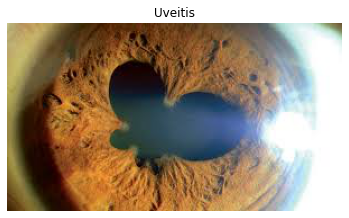

In [ ]:
img = view_random_image(target_dir="Eye_diseases/train", 
                  target_class="Uveitis")

In [ ]:
# Set the train directory path
train_dir = "Eye_diseases/train"
test_dir = "Eye_diseases/test/"

## Load and Preprocess Images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess the data (rescale the values of pixels in between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                  rotation_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.0)

# Load the data
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(128, 128),
                                            batch_size = 32,
                                            class_mode='categorical')

Found 346 images belonging to 5 classes.
Found 101 images belonging to 5 classes.


## Building the CNN Model

In [ ]:
# Set the random seed value
tf.keras.utils.set_random_seed(43)

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(128, 128, 3),
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=len(class_names),
                         activation='softmax')
])

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

# Fit the model
history = model.fit(train_data,
                   epochs=80,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/80
11/11 [==============================] - 8s 600ms/step - loss: 1.4268 - accuracy: 0.4711 - val_loss: 1.5429 - val_accuracy: 0.2970
Epoch 2/80
11/11 [==============================] - 6s 542ms/step - loss: 1.3768 - accuracy: 0.4740 - val_loss: 1.4940 - val_accuracy: 0.2970
Epoch 3/80
11/11 [==============================] - 6s 544ms/step - loss: 1.3755 - accuracy: 0.4740 - val_loss: 1.7299 - val_accuracy: 0.2970
Epoch 4/80
11/11 [==============================] - 6s 545ms/step - loss: 1.3269 - accuracy: 0.4740 - val_loss: 1.5103 - val_accuracy: 0.2970
Epoch 5/80
11/11 [==============================] - 6s 560ms/step - loss: 1.3100 - accuracy: 0.4740 - val_loss: 1.5648 - val_accuracy: 0.2970
Epoch 6/80
11/11 [==============================] - 6s 556ms/step - loss: 1.2884 - accuracy: 0.4855 - val_loss: 1.5382 - val_accuracy: 0.3267
Epoch 7/80
11/11 [==============================] - 6s 548ms/step - loss: 1.2617 - accuracy: 0.4855 - val_loss: 1.5259 - val_accuracy: 0.3465
Epoch 

11/11 [==============================] - 6s 576ms/step - loss: 0.9540 - accuracy: 0.5867 - val_loss: 1.0421 - val_accuracy: 0.6139
Epoch 59/80
11/11 [==============================] - 6s 548ms/step - loss: 0.9905 - accuracy: 0.6156 - val_loss: 1.0558 - val_accuracy: 0.6139
Epoch 60/80
11/11 [==============================] - 6s 555ms/step - loss: 0.9632 - accuracy: 0.6127 - val_loss: 1.0620 - val_accuracy: 0.5743
Epoch 61/80
11/11 [==============================] - 6s 555ms/step - loss: 0.9142 - accuracy: 0.6329 - val_loss: 1.0634 - val_accuracy: 0.6040
Epoch 62/80
11/11 [==============================] - 6s 551ms/step - loss: 0.9504 - accuracy: 0.6185 - val_loss: 1.1849 - val_accuracy: 0.5149
Epoch 63/80
11/11 [==============================] - 6s 575ms/step - loss: 1.0153 - accuracy: 0.5809 - val_loss: 1.0744 - val_accuracy: 0.5446
Epoch 64/80
11/11 [==============================] - 6s 560ms/step - loss: 1.0151 - accuracy: 0.5578 - val_loss: 1.0355 - val_accuracy: 0.6040
Epoch 65/80

In [ ]:
import pandas as pd
# pd.DataFrame(history.history)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 9000)              0         
                                                                 
 dense_3 (Dense)             (None, 5)                

In [ ]:
# pd.DataFrame(history.history).iloc[:, :2].plot()

# let's plot graph for train and test for validation and train data
def plot_loss_curves(history):
    """
    Plot the train and validation loss and accuracy curves separately.
    
    Args:
        history (object): model history object
    
    Returns:
        Plot the graph separately
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    # Plot the graph for loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot the graph for accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel('Epochs')
    plt.legend()

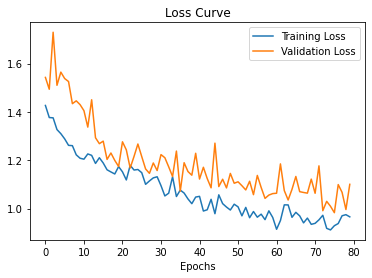

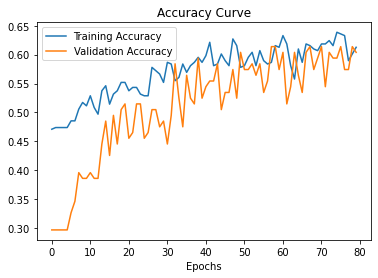

In [ ]:
plot_loss_curves(history)

## Make prediction on the test data

In [ ]:
y_preds = model.predict(test_data)
y_preds

4/4 [==============================] - 3s 108ms/step


array([[7.93278159e-04, 2.44294322e-04, 5.24941795e-02, 8.91349316e-01,
        5.51189855e-02],
       [5.91861829e-03, 3.76245975e-02, 1.13330055e-02, 1.97043791e-02,
        9.25419450e-01],
       [3.63830663e-02, 4.15530394e-06, 5.60456514e-01, 3.99508566e-01,
        3.64777027e-03],
       [4.46639776e-01, 5.40551124e-03, 2.31876701e-01, 2.34838635e-01,
        8.12394172e-02],
       [1.14107355e-01, 1.36084724e-02, 6.04097962e-01, 1.55363292e-01,
        1.12822995e-01],
       [8.08353815e-03, 3.61733168e-01, 6.90321028e-02, 4.11783427e-01,
        1.49367765e-01],
       [1.51085120e-03, 8.67062151e-01, 1.14791721e-01, 1.63211767e-02,
        3.14124918e-04],
       [5.58290118e-03, 2.18467508e-03, 6.42638266e-01, 3.25584799e-01,
        2.40092929e-02],
       [7.63082784e-03, 7.83647001e-02, 2.49402106e-01, 4.87224877e-01,
        1.77377567e-01],
       [2.21273187e-03, 2.67789029e-02, 1.58856530e-02, 6.79048181e-01,
        2.76074499e-01],
       [6.02865517e-01, 4.9353

In [ ]:
# Create a function to import an image and resize it to the be used in our model
def load_and_prep_image(filename, img_shape=224):
    """Read and image from a filename, turns it into tensor and reshape it to 
    (img_shape, img_shape, color_channel).

    filename: name of the file to be preprcessed
    img_shape: shape of the image, default=224
    """

    # Read the image
    img = tf.io.read_file(filename)
    # Decode the read file into tensors
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, (img_shape, img_shape))
    # Recale the image (get all values in between 0 and 1)
    img = img/255.0

    return img

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    """Import an image located at the filename, makes a prediction with the model,
    and plot the image with the predicted class as the title.

    model: model's instance on which you want to make prediction
    filename: name of the image file
    class_names: list of class names of the images
    """
    # Import the target image and preprocess it.
    img = load_and_prep_image(filename, img_shape=128)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    print(pred)
    print(tf.argmax(pred))

    # Get the predicted class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]

    # Plot the image and the predicted class 
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class.title()}\nPrediction Probability: {tf.reduce_max(pred)}\n")
    plt.axis(False)

In [ ]:
class_names

array(['Bulging_Eyes', 'Cataracts', 'Crossed_Eyes', 'Glaucoma', 'Uveitis'],
      dtype='<U12')

1/1 [==============================] - 0s 62ms/step
[[0.0066005  0.0566581  0.01235688 0.02677419 0.8976103 ]]
tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


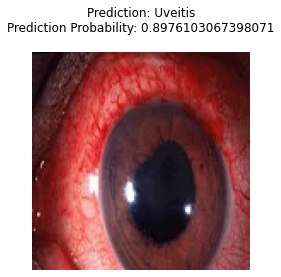

In [ ]:
# Test our image on custom images
pred_and_plot(model=model, filename='Eye_diseases/uvetis.jpeg', class_names=class_names)

1/1 [==============================] - 0s 62ms/step
[[0.00604289 0.28329864 0.16294579 0.3751438  0.17256884]]
tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


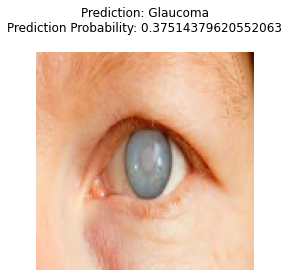

In [ ]:
# Test our image on custom images
pred_and_plot(model=model, filename='Eye_diseases/glucoma.jpeg', class_names=class_names)

1/1 [==============================] - 0s 64ms/step
[[0.02718149 0.4769998  0.25934342 0.03026821 0.20620717]]
tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


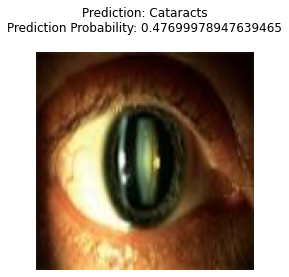

In [ ]:
# Test our image on custom images
pred_and_plot(model=model, filename='Eye_diseases/catract.jpeg', class_names=class_names)

1/1 [==============================] - 0s 63ms/step
[[0.05252136 0.01292135 0.65654707 0.2597904  0.01821985]]
tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


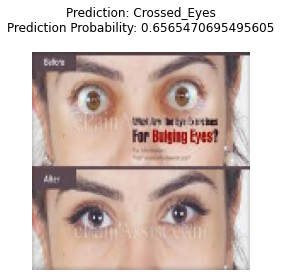

In [ ]:
# Test our image on custom images
pred_and_plot(model=model, filename='Eye_diseases/Bulging-eye.jpeg', class_names=class_names)

1/1 [==============================] - 0s 47ms/step
[[0.01004528 0.02247195 0.79365456 0.14701325 0.02681498]]
tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


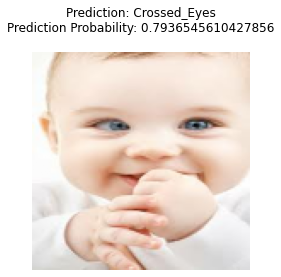

In [ ]:
# Test our image on custom images
pred_and_plot(model=model, filename='Eye_diseases/crossed-eye.jpeg', class_names=class_names)